In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
import sys
sys.path.append('../lib')
from data_pre_processing import load_data
sys.path.remove('../lib')


In [3]:
_, X, y = load_data('c6288', '../data/output')

FileNotFoundError: [Errno 2] No such file or directory: '../data/output/c6288.x'

In [4]:
X.shape, len(y)

((6288, 4), 6288)

In [19]:
y = np.array(y)
y[y == 'eo']=0
y[y=='ho']=1

In [25]:
y = y.astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5030, 4) (5030,)
(1258, 4) (1258,)


In [27]:
lm = DecisionTreeClassifier()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

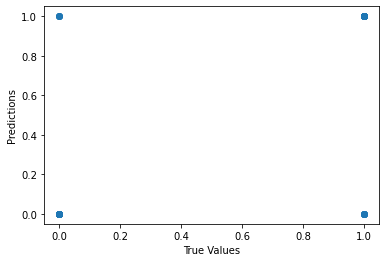

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [29]:
print ("Score:", model.score(X_test, y_test))

Score: 0.9936406995230525


In [30]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 10 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [32]:
for train_index, test_index in kf.split(X):
 
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 629  630  631 ... 6285 6286 6287] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [34]:
from sklearn.model_selection import LeaveOneOut 

loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [   1    2    3 ... 6285 6286 6287] TEST: [0]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	18
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	28
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	37
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    2    3 ... 6285 6286 6287] TEST: [1]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	18
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	502 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [63]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	

  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	210 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [131]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	210 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [132]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [197]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	460 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [198]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	722 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [254]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)

  (0, 3)	721 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [322]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	633 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [323]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)

  (0, 3)	470 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [376]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	456 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [377]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [422]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	280 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [423]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [472]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	60 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [473]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [514]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	89 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [515]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1

  (6286, 2)	69   (0, 0)	5
  (0, 1)	3
  (0, 2)	4
  (0, 3)	720 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [556]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	5
  (0, 1)	3
  (0, 2)	4
  (0, 3)	718 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [557]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [599]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	6
  (0, 1)	4
  (0, 2)	5
  (0, 3)	276 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [600]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [657]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	10
  (0, 1)	4
  (0, 2)	9
  (0, 3)	204 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [658]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)

  (0, 3)	356 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [710]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	8
  (0, 1)	6
  (0, 2)	9
  (0, 3)	359 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [711]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	13
  (0, 1)	8
  (0, 2)	15
  (0, 3)	197 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [761]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	15
  (0, 1)	9
  (0, 2)	14
  (0, 3)	638 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [828]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 

  (6286, 2)	69   (0, 0)	16
  (0, 1)	15
  (0, 2)	18
  (0, 3)	452 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [857]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	16
  (0, 1)	9
  (0, 2)	15
  (0, 3)	458 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [858]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	39 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [876]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	18
  (0, 1)	16
  (0, 2)	25
  (0, 3)	67 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [877]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [895]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	633 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [896]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [917]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	68 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [918]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [942]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	15
  (0, 1)	9
  (0, 2)	14
  (0, 3)	439 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [943]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0

  (0, 3)	736 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [971]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	738 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [972]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	21
  (0, 1)	20
  (0, 2)	21
  (0, 3)	437 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1009]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4

  (6286, 2)	69   (0, 0)	22
  (0, 1)	15
  (0, 2)	14
  (0, 3)	106 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1070]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	23
  (0, 1)	8
  (0, 2)	25
  (0, 3)	162 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1071]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1132]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	26
  (0, 1)	25
  (0, 2)	24
  (0, 3)	656 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1133]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (0, 3)	494 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1176]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	28
  (0, 1)	25
  (0, 2)	41
  (0, 3)	343 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1177]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1239]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	752 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1240]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1300]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	32
  (0, 1)	8
  (0, 2)	34
  (0, 3)	341 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1301]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1359]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	32
  (0, 1)	25
  (0, 2)	20
  (0, 3)	404 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1360]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	364 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1424]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	36
  (0, 1)	28
  (0, 2)	40
  (0, 3)	347 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1425]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1482]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	35
  (0, 1)	21
  (0, 2)	34
  (0, 3)	139 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1483]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (6286, 2)	69   (0, 0)	41
  (0, 1)	4
  (0, 2)	7
  (0, 3)	36 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1556]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	41
  (0, 1)	35
  (0, 2)	36
  (0, 3)	71 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1557]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1


TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1619]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	46
  (0, 1)	4
  (0, 2)	11
  (0, 3)	246 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1620]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3,

  (0, 3)	110 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1681]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	48
  (0, 1)	12
  (0, 2)	9
  (0, 3)	100 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1682]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	49
  (0, 1)	4
  (0, 2)	40
  (0, 3)	640 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1744]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4,

  (0, 3)	715 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1813]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	50
  (0, 1)	4
  (0, 2)	40
  (0, 3)	748 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1814]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2

  (6286, 2)	69   (0, 0)	53
  (0, 1)	8
  (0, 2)	46
  (0, 3)	95 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1875]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	52
  (0, 1)	41
  (0, 2)	32
  (0, 3)	62 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1876]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1943]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	52
  (0, 1)	41
  (0, 2)	32
  (0, 3)	777 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [1944]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2008]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	58
  (0, 1)	43
  (0, 2)	81
  (0, 3)	52 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2009]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2067]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	359 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2068]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0

  (0, 3)	311 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2131]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	61
  (0, 1)	4
  (0, 2)	7
  (0, 3)	354 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2132]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2,

  (0, 3)	180 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2200]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	100 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2201]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2266]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	66
  (0, 1)	53
  (0, 2)	48
  (0, 3)	392 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2267]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2323]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	69
  (0, 1)	4
  (0, 2)	7
  (0, 3)	734 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2324]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 

  (0, 3)	684 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2376]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	68
  (0, 1)	49
  (0, 2)	93
  (0, 3)	699 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2377]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

  (6286, 2)	69   (0, 0)	71
  (0, 1)	53
  (0, 2)	54
  (0, 3)	347 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2423]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	71
  (0, 1)	4
  (0, 2)	7
  (0, 3)	396 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2424]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	74
  (0, 1)	45
  (0, 2)	62
  (0, 3)	793 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2477]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	723 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2534]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1

  (6286, 2)	69   (0, 0)	78
  (0, 1)	55
  (0, 2)	105
  (0, 3)	64 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2595]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	117 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2596]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	78
  (0, 1)	55
  (0, 2)	105
  (0, 3)	388 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2657]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (

  (0, 3)	741 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2724]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	81
  (0, 1)	59
  (0, 2)	60
  (0, 3)	686 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2725]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

  (0, 3)	560 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2782]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	86
  (0, 1)	65
  (0, 2)	66
  (0, 3)	570 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2783]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

  (6286, 2)	69   (0, 0)	91
  (0, 1)	4
  (0, 2)	11
  (0, 3)	65 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2850]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	86
  (0, 1)	65
  (0, 2)	60
  (0, 3)	62 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2851]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

  (6286, 2)	69   (0, 0)	84
  (0, 1)	51
  (0, 2)	68
  (0, 3)	621 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2913]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	89
  (0, 1)	4
  (0, 2)	64
  (0, 3)	668 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2914]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2977]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	90
  (0, 1)	4
  (0, 2)	64
  (0, 3)	740 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [2978]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3038]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	90
  (0, 1)	57
  (0, 2)	74
  (0, 3)	499 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3039]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3103]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	92
  (0, 1)	65
  (0, 2)	56
  (0, 3)	278 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3104]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	98
  (0, 1)	4
  (0, 2)	70
  (0, 3)	738 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3168]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3221]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	101
  (0, 1)	63
  (0, 2)	80
  (0, 3)	728 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3222]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

  (0, 3)	665 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3283]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	101
  (0, 1)	71
  (0, 2)	62
  (0, 3)	602 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3284]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  

  (6286, 2)	69   (0, 0)	107
  (0, 1)	44
  (0, 2)	91
  (0, 3)	279 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3348]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	108
  (0, 1)	28
  (0, 2)	43
  (0, 3)	132 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3349]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3415]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	105
  (0, 1)	63
  (0, 2)	80
  (0, 3)	569 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3416]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3480]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	108
  (0, 1)	8
  (0, 2)	82
  (0, 3)	787 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3481]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (6286, 2)	69   (0, 0)	110
  (0, 1)	8
  (0, 2)	82
  (0, 3)	657 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3523]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	110
  (0, 1)	77
  (0, 2)	68
  (0, 3)	588 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3524]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3575]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	110
  (0, 1)	4
  (0, 2)	76
  (0, 3)	736 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3576]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3610]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	116
  (0, 1)	8
  (0, 2)	15
  (0, 3)	130 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3611]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	115
  (0, 1)	83
  (0, 2)	74
  (0, 3)	686 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3650]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (

  (6286, 2)	69   (0, 0)	116
  (0, 1)	8
  (0, 2)	88
  (0, 3)	782 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3691]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	118
  (0, 1)	75
  (0, 2)	92
  (0, 3)	715 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3692]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3715]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	112
  (0, 1)	77
  (0, 2)	68
  (0, 3)	164 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3716]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3744]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	119
  (0, 1)	75
  (0, 2)	92
  (0, 3)	813 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3745]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

  (6286, 2)	69   (0, 0)	122
  (0, 1)	4
  (0, 2)	88
  (0, 3)	725 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3797]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	3
  (0, 1)	2
  (0, 2)	3
  (0, 3)	727 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3798]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

  (0, 3)	452 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3848]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	123
  (0, 1)	8
  (0, 2)	57
  (0, 3)	484 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3849]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3893]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	120
  (0, 1)	83
  (0, 2)	74
  (0, 3)	805 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3894]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	121
  (0, 1)	83
  (0, 2)	74
  (0, 3)	805 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3940]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3986]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	124
  (0, 1)	89
  (0, 2)	84
  (0, 3)	715 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [3987]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4050]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	127
  (0, 1)	8
  (0, 2)	94
  (0, 3)	795 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4051]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	133
  (0, 1)	8
  (0, 2)	77
  (0, 3)	522 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4111]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4

  (0, 3)	734 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4154]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	128
  (0, 1)	81
  (0, 2)	98
  (0, 3)	551 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4155]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  

  (0, 3)	91 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4180]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	130
  (0, 1)	4
  (0, 2)	88
  (0, 3)	93 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4181]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4191]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	130
  (0, 1)	4
  (0, 2)	88
  (0, 3)	451 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4192]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4203]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	130
  (0, 1)	89
  (0, 2)	80
  (0, 3)	809 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4204]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

  (0, 3)	790 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4219]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	136
  (0, 1)	87
  (0, 2)	104
  (0, 3)	711 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4220]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
 

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4282]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	140
  (0, 1)	8
  (0, 2)	37
  (0, 3)	200 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4283]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	132
  (0, 1)	89
  (0, 2)	80
  (0, 3)	188 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4340]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	136
  (0, 1)	91
  (0, 2)	177
  (0, 3)	643 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4389]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	143
  (0, 1)	4
  (0, 2)	7
  (0, 3)	710 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4452]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4,

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4500]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	141
  (0, 1)	95
  (0, 2)	96
  (0, 3)	5 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4501]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3,

  (6286, 2)	69   (0, 0)	146
  (0, 1)	4
  (0, 2)	7
  (0, 3)	710 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4548]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	147
  (0, 1)	8
  (0, 2)	106
  (0, 3)	625 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4549]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4600]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	148
  (0, 1)	97
  (0, 2)	189
  (0, 3)	106 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4601]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4657]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	159
  (0, 1)	104
  (0, 2)	202
  (0, 3)	497 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4658]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
 

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4721]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	185
  (0, 1)	111
  (0, 2)	296
  (0, 3)	419 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4722]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
 

  (6286, 2)	69   (0, 0)	208
  (0, 1)	84
  (0, 2)	133
  (0, 3)	133 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4779]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	208
  (0, 1)	132
  (0, 2)	167
  (0, 3)	85 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4780]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (

  (0, 3)	32 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4817]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 1)	1
  (0, 2)	1
  (0, 3)	19 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4818]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4859]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	4
  (0, 1)	3
  (0, 2)	4
  (0, 3)	357 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4860]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0

  (6286, 2)	69   (0, 0)	12
  (0, 1)	8
  (0, 2)	15
  (0, 3)	30 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4910]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	11
  (0, 1)	5
  (0, 2)	8
  (0, 3)	36 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4911]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
 

  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	458 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4968]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	17
  (0, 1)	16
  (0, 2)	25
  (0, 3)	556 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [4969]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

  (6286, 2)	69   (0, 0)	27
  (0, 1)	4
  (0, 2)	11
  (0, 3)	121 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5047]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	27
  (0, 1)	25
  (0, 2)	41
  (0, 3)	10 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5048]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	

  (0, 3)	275 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5126]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	34
  (0, 1)	21
  (0, 2)	34
  (0, 3)	377 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5127]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

  (6286, 2)	69   (0, 0)	42
  (0, 1)	8
  (0, 2)	40
  (0, 3)	713 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5203]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	41
  (0, 1)	35
  (0, 2)	26
  (0, 3)	686 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5204]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)

  (6286, 2)	69   (0, 0)	52
  (0, 1)	8
  (0, 2)	15
  (0, 3)	100 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5279]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	106 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5280]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1


  (0, 3)	736 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5348]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	57
  (0, 1)	43
  (0, 2)	81
  (0, 3)	695 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5349]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

  (0, 3)	306 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5389]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	61
  (0, 1)	47
  (0, 2)	38
  (0, 3)	284 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5390]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	161 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5436]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5495]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	72
  (0, 1)	8
  (0, 2)	58
  (0, 3)	689 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5496]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3,

  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	593 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5541]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	77
  (0, 1)	55
  (0, 2)	105
  (0, 3)	679 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5542]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	

  (6286, 2)	69   (0, 0)	84
  (0, 1)	4
  (0, 2)	64
  (0, 3)	420 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5579]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	85
  (0, 1)	8
  (0, 2)	37
  (0, 3)	284 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5580]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	

  (6286, 2)	69   (0, 0)	90
  (0, 1)	48
  (0, 2)	83
  (0, 3)	268 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5628]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	314 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5629]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

  (6286, 2)	69   (0, 0)	91
  (0, 1)	65
  (0, 2)	56
  (0, 3)	616 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5674]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	92
  (0, 1)	57
  (0, 2)	74
  (0, 3)	607 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5675]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0

  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	728 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5724]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	97
  (0, 1)	4
  (0, 2)	70
  (0, 3)	660 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5725]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1


TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5765]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	102
  (0, 1)	73
  (0, 2)	141
  (0, 3)	646 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5766]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  

  (6286, 2)	69   (0, 0)	104
  (0, 1)	63
  (0, 2)	80
  (0, 3)	593 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5812]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	105
  (0, 1)	73
  (0, 2)	141
  (0, 3)	655 [0 0 0 ... 0 0 0] [1]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5813]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1

  (6286, 2)	69   (0, 0)	113
  (0, 1)	8
  (0, 2)	57
  (0, 3)	390 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5854]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	113
  (0, 1)	72
  (0, 2)	63
  (0, 3)	326 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5855]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 

  (6286, 2)	69   (0, 0)	2
  (0, 1)	2
  (0, 2)	3
  (0, 3)	440 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5906]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	119
  (0, 1)	4
  (0, 2)	51
  (0, 3)	223 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5907]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5972]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	124
  (0, 1)	89
  (0, 2)	80
  (0, 3)	551 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [5973]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

  (6286, 2)	69   (0, 0)	133
  (0, 1)	58
  (0, 2)	81
  (0, 3)	289 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6042]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	134
  (0, 1)	28
  (0, 2)	43
  (0, 3)	90 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6043]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	135
  (0, 1)	95
  (0, 2)	86
  (0, 3)	546 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6092]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (

  (6286, 2)	69   (0, 0)	137
  (0, 1)	4
  (0, 2)	94
  (0, 3)	628 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6133]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	138
  (0, 1)	8
  (0, 2)	100
  (0, 3)	633 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6134]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 

TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6176]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	142
  (0, 1)	8
  (0, 2)	100
  (0, 3)	186 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6177]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	28
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	28
  (6, 0)	1
  :	:
  (6278, 2)	419
  (6279, 0)	193
  (6279, 1)	307
  (6279, 2)	419
  (6280, 0)	197
  (6280, 1)	298
  (6280, 2)	410
  (6281, 0)	201
  (6281, 1)	254
  (6281, 2)	366
  (6282, 0)	205
  (6282, 1)	194
  (6282, 2)	297
  (6283, 0)	209
  (6283, 1)	134
  (6283, 2)	217
  (6284, 0)	213
  (6284, 1)	74
  (6284, 2)	137
  (6285, 0)	216
  (6285, 1)	16
  (6285, 2)	21
  (6286, 0)	217
  (6286, 1)	26
  (6286, 2)	69   (0, 0)	164
  (0, 1)	111
  (0, 2)	293
  (0, 3)	406 [0 0 0 ... 0 0 0] [0]
TRAIN: [   0    1    2 ... 6285 6286 6287] TEST: [6219]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	2
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	18
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	18
  (4, 0)	1
 

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [37]:
scores = cross_val_score(model,X,y, cv=10)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.96979332 0.95071542 0.94435612 0.97774245 0.98251192 0.9936407
 0.99841017 1.         0.99681529 0.99203822]


In [40]:
predictions = cross_val_predict(model, X, y, cv=10)
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.8292763663755243
